In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

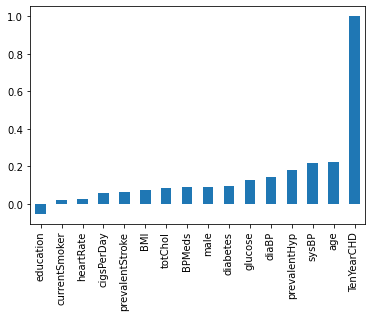

In [6]:
df.corr()['TenYearCHD'].sort_values().plot(kind='bar')

In [7]:
df = df.drop('education',axis=1)

Here, I have dropped the eductaion column as it has a negative correlation with the target variable and won't be of much use while making predictions.

## Filling in the Null Values

The null values of continuous features are filled with mean and for BPMeds which is a categorical one, it is filled with the mode.

In [8]:
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [9]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [10]:
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())

In [11]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [12]:
df['BPMeds'] = df['BPMeds'].astype('int64')

In [13]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

In [14]:
df['cigsPerDay'] = df['cigsPerDay'].astype('int64')

In [15]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

In [16]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
# Renaming the male column to gender to make it more understandable. 1 refers to Male and 0 refers to Female.
df = df.rename(columns = {'male':'gender'})

In [18]:
df.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
X = df.drop('TenYearCHD',axis=1) 
y  = df['TenYearCHD']

### Handling Imbalanced Data

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm = SMOTE()

In [22]:
X_res_new, y_res_new = sm.fit_resample(X,y)

In [23]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res_new)))

Original dataset shape Counter({0: 3594, 1: 644})
Resampled dataset shape Counter({0: 3594, 1: 3594})


## Model Building

For this project, I will make use of 3 models and choose the one that has the best AUC Score from ROC Curve. The 3 models that are used are :-

- Random Forest Classifier
- Support Vector Machines Classifier
- Logistic Regression

To get the best parameters for the model, I have used RandomizedSearch CV for the Random Forest Model and Grid Search CV for the SVM model.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV

In [25]:
#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res_new, y_res_new, test_size=0.30, random_state=42)

## Random Forest Classifier

In [26]:
rmod = RandomForestClassifier()

In [27]:
n_estimators = [100,200,300]
max_features = ['auto','sqrt']
max_depth =[10,20,30]
min_samples_split = [5,10,14]
min_samples_leaf = [4,6,8]

In [28]:
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [29]:
rf_random = RandomizedSearchCV(estimator = rmod, param_distributions=random_grid, n_iter = 100, cv = 5, verbose = 2,
                              n_jobs = -1)

In [30]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 10, 14],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [31]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [32]:
rpred = rf_random.predict(X_test)

Random Forest Classifier


              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1090
           1       0.81      0.87      0.84      1067

    accuracy                           0.83      2157
   macro avg       0.84      0.83      0.83      2157
weighted avg       0.84      0.83      0.83      2157

[[867 223]
 [134 933]]


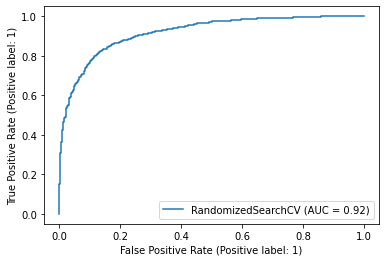

In [33]:
print('Random Forest Classifier')
print('\n')
print(classification_report(y_test,rpred))
print(confusion_matrix(y_test,rpred))
plot_roc_curve(rf_random,X_test,y_test);

## SVM Classifier

For SVM as well as Logistic Regression, it is necessary we scale down the values. Hence, I have used Standard Scaler to do so.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [40]:
# scaling the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
sv = SVC()

In [45]:
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
sv_grid = GridSearchCV(sv,param_grid,verbose=2)

In [46]:
sv_grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.7s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.8s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.8s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.8s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.9s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.9s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.9s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.9s
[CV] END .................................C=0.01, kernel=rbf; total time=   2.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.9s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.9s
[CV] END ...............................C=0.1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [47]:
svpred = sv_grid.predict(X_test)

SVM Classifier


              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1090
           1       0.70      0.79      0.74      1067

    accuracy                           0.73      2157
   macro avg       0.73      0.73      0.73      2157
weighted avg       0.73      0.73      0.73      2157

[[729 361]
 [227 840]]


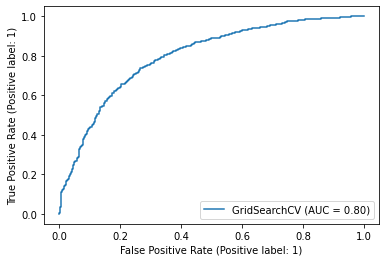

In [48]:
print('SVM Classifier')
print('\n')
print(classification_report(y_test,svpred))
print(confusion_matrix(y_test,svpred))
plot_roc_curve(sv_grid,X_test,y_test);

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log = LogisticRegression()

In [51]:
# scaling the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
log.fit(X_train,y_train)

LogisticRegression()

In [53]:
lpred = log.predict(X_test)

Logostic Regression Classifier


              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1090
           1       0.67      0.70      0.68      1067

    accuracy                           0.68      2157
   macro avg       0.68      0.68      0.68      2157
weighted avg       0.68      0.68      0.68      2157

[[719 371]
 [322 745]]


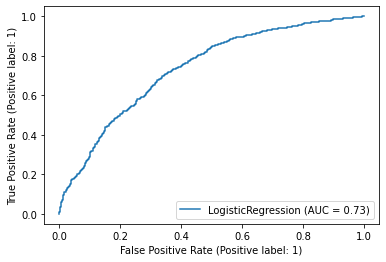

In [54]:
print('Logostic Regression Classifier')
print('\n')
print(classification_report(y_test,lpred))
print(confusion_matrix(y_test,lpred))
plot_roc_curve(log,X_test,y_test);

After comparing all the 3 models, I have chosen **Random Forest Classifier** to be the best model to make prediction as it has a significantly better AUC Score compared to the other 2 models.

## Saving the model

In [56]:
import pickle

In [57]:
file = open('new_rf_model.pkl', 'wb')
pickle.dump(rf_random, file)